In [30]:
import numpy as np 
import pandas as pd 

#Visualization
import matplotlib.pyplot as plt

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics


In [34]:
data=np.load("olivetti_faces.npy")
target=np.load("olivetti_faces_target.npy")

In [35]:
def print_summary(target, lables):

    print("There are {} images in the dataset".format(len(data)))
    print("There are {} unique targets in the dataset".format(len(np.unique(target))))
    print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
    print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

In [36]:
print_summary(data, target)

There are 400 images in the dataset
There are 240 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


###  Show 48 Disticnt People in the Olivetti Dataset

In [37]:
def show_40_distinct_people(images, labels):
    
    
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    i = 0
    for unique_id in lables:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

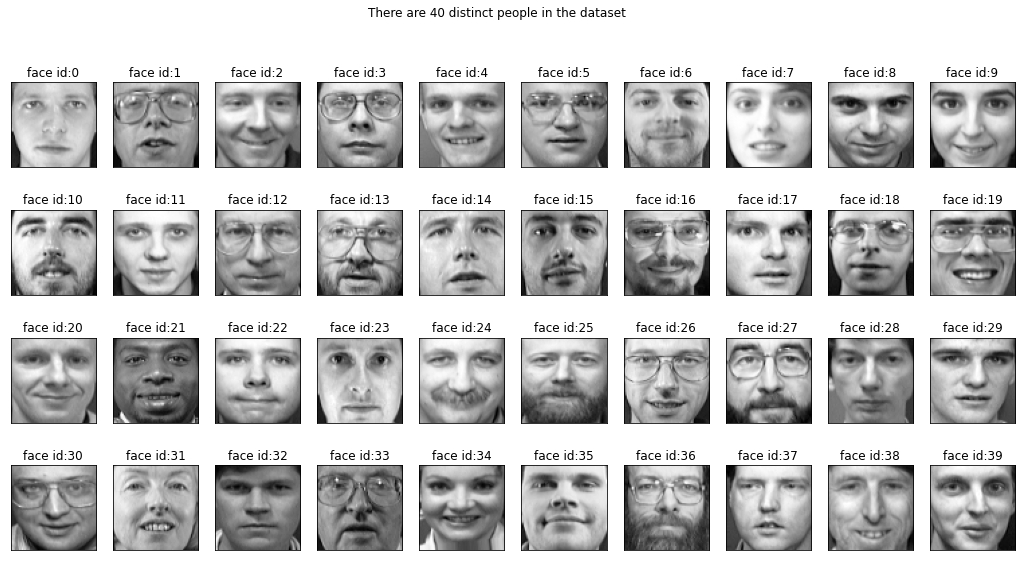

In [38]:
show_40_distinct_people(data, np.unique(target))

In [48]:
def show_different_data_of_the_same_person(data, count, target):
    cols=count
    rows=(len(target)*cols)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, person_target in enumerate(target):
        for j in range(cols):
            image_index=person_target*cols + j
            axarr[i,j].imshow(data[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("person target:{}".format(person_target))

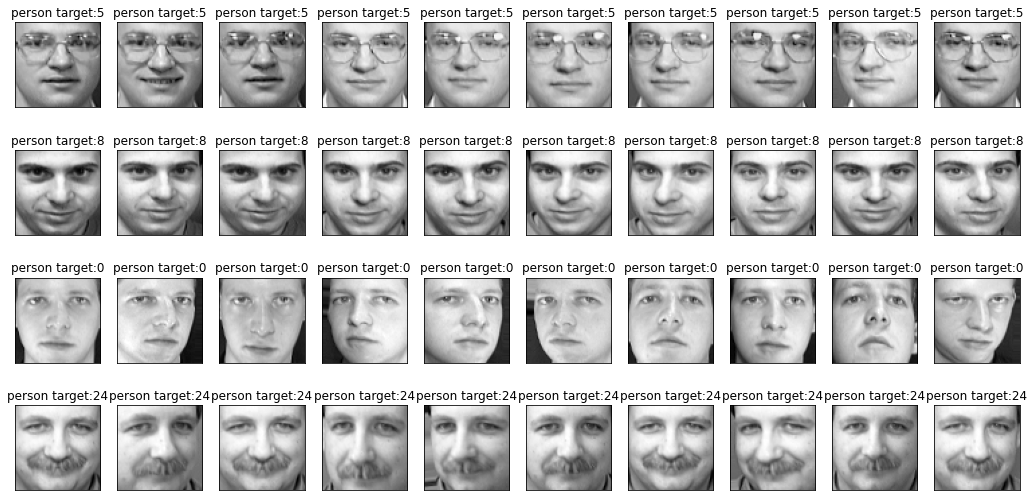

In [49]:
show_different_data_of_the_same_person(data, 10, [5, 8, 0, 24])

In [50]:
# Reshape the images for machine learning
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [51]:
# Split the data into training and testing
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


In [61]:
def show_2_component_pca(X, target, count):
    # Pricipal Component Analysis
    pca=PCA(n_components=2)
    pca.fit(X)
    X_pca=pca.transform(X)
    number_of_people=count
    index_range=number_of_people*count
    fig=plt.figure(figsize=(10,8))
    ax=fig.add_subplot(1,1,1)
    scatter=ax.scatter(X_pca[:index_range,0],
                X_pca[:index_range,1], 
                c=target[:index_range],
                s=25,
               cmap=plt.get_cmap('jet', number_of_people)
              )

    #ax.set_xtarget("First Principle Component")
    #ax.set_ytarget("Second Principle Component")
    ax.set_title("Two-component PCA projection for {} people".format(number_of_people))

    fig.colorbar(scatter)

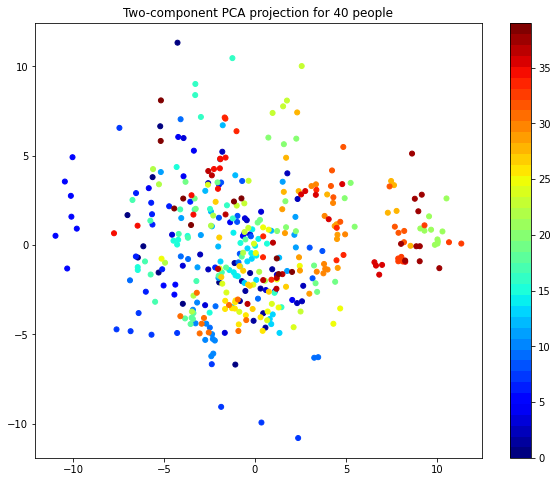

In [62]:
show_2_component_pca(X, target, len(np.unique(target)))

In [63]:
# Generate a model using 90 components
pca=PCA(n_components=90, whiten=True)
pca.fit(X_train)


PCA(n_components=90, whiten=True)

In [68]:

n_components=90
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=90, whiten=True)

 ### Show Average Face

Text(0.5, 1.0, 'Average Face')

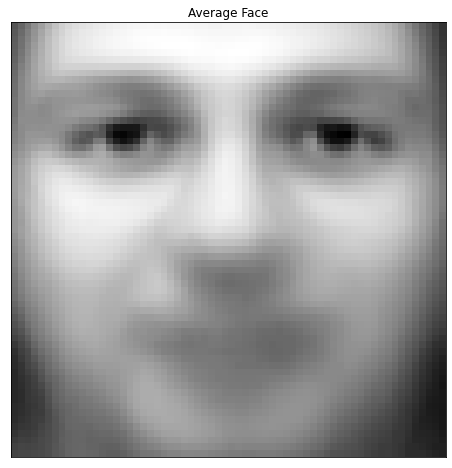

In [69]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

# Show Eigen Faces

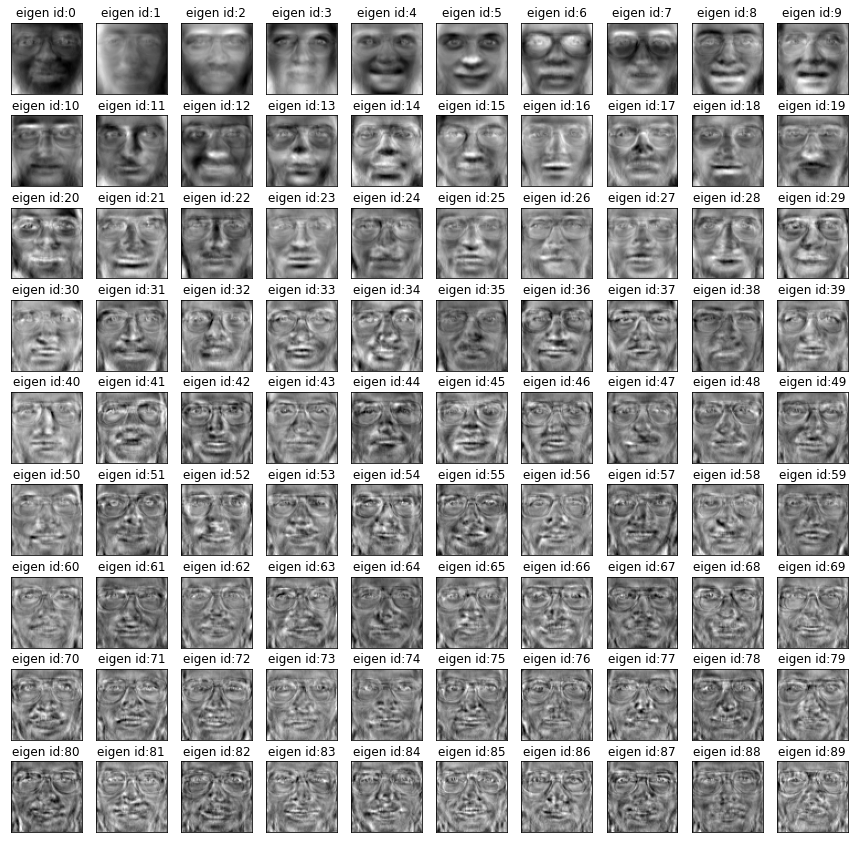

In [70]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))

In [71]:

plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

Text(0.5, 0.98, 'All Eigen Faces')

<Figure size 432x288 with 0 Axes>

In [72]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [73]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:0.92


<AxesSubplot:>

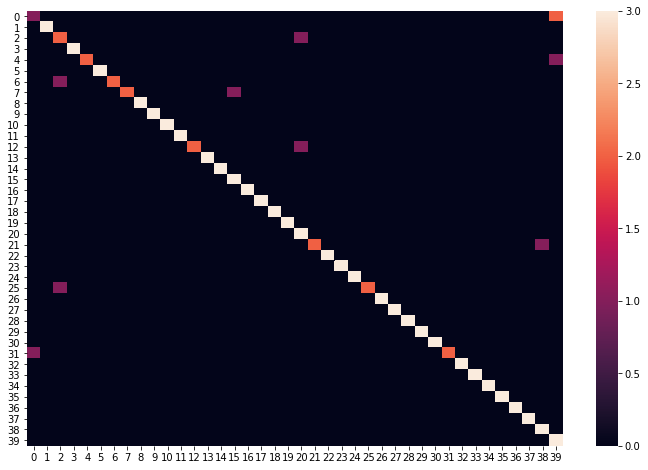

In [74]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [75]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         3
           2       0.50      0.67      0.57         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      1.00      1.00         3
          17       1.00    

## More Results

#### We can get accuracy results of state of the art machine learning model.

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [77]:
models=[]

models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))


for name, model in models:
    
    clf=model

    clf.fit(X_train_pca, y_train)

    y_pred=clf.predict(X_test_pca)
    print(10*"=","{} Result".format(name).upper(),10*"=")
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

========== LR RESULT ==========
Accuracy score:0.93

========== NB RESULT ==========
Accuracy score:0.86

========== KNN RESULT ==========
Accuracy score:0.72

========== DT RESULT ==========
Accuracy score:0.66

========== SVM RESULT ==========
Accuracy score:0.92

